In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns',None)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

# Data Cleaning

In [8]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
df.duplicated().sum()

1

In [10]:
df.shape

(202, 26)

In [11]:
dataset = df.drop_duplicates()

In [12]:
dataset.shape

(201, 26)

In [13]:
dataset.duplicated().sum()

0

In [14]:
dataset.isnull().sum().sort_values(ascending=False)

normalized-losses    37
num-of-doors          2
symboling             0
engine-type           0
highway-mpg           0
city-mpg              0
peak-rpm              0
horsepower            0
compression-ratio     0
stroke                0
bore                  0
fuel-system           0
engine-size           0
num-of-cylinders      0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
price                 0
dtype: int64

In [15]:
dataset['normalized-losses'].fillna(dataset['normalized-losses'].mean(),inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10876\709359421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['normalized-losses'].fillna(dataset['normalized-losses'].mean(),inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10876\709359421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['normalized-losses'].fillna(datas

In [16]:
dataset.isnull().sum().sort_values(ascending=False)

num-of-doors         2
symboling            0
engine-type          0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
curb-weight          0
normalized-losses    0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
aspiration           0
fuel-type            0
make                 0
price                0
dtype: int64

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [18]:
dataset.shape

(201, 26)

# Feature Engineering

In [20]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [21]:
dataset["horsepower"] = pd.to_numeric(dataset["horsepower"], errors="coerce")

C:\Users\PC\AppData\Local\Temp\ipykernel_10876\2082652123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["horsepower"] = pd.to_numeric(dataset["horsepower"], errors="coerce")


In [22]:
mean_hp = dataset["horsepower"].mean(skipna=True)
dataset["horsepower"] = dataset["horsepower"].fillna(mean_hp)

C:\Users\PC\AppData\Local\Temp\ipykernel_10876\1222261092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["horsepower"] = dataset["horsepower"].fillna(mean_hp)


In [23]:
dataset['hp_w_ratio'] = dataset['horsepower']/ dataset['curb-weight']

C:\Users\PC\AppData\Local\Temp\ipykernel_10876\2749533378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['hp_w_ratio'] = dataset['horsepower']/ dataset['curb-weight']


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [25]:
dataset.shape

(201, 27)

# EDA

In [27]:
dataset['fuel-type'].value_counts()

fuel-type
gas       181
diesel     20
Name: count, dtype: int64

In [28]:
dataset['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

In [29]:
dataset['aspiration'].value_counts()

aspiration
std      165
turbo     36
Name: count, dtype: int64

In [30]:
dataset['symboling'].value_counts()

symboling
 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [31]:
dataset['body-style'].value_counts()

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PC\AppData\Local\Temp\ipykernel_10876\1294281410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = car_maker.index, y = car_maker, palette='viridis')


Text(0.5, 1.0, 'Counts of car maker')

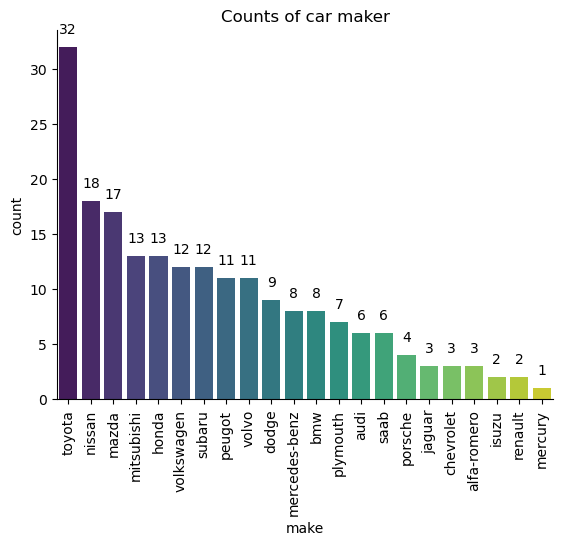

In [33]:
car_maker = dataset['make'].value_counts()
sns.barplot(x = car_maker.index, y = car_maker, palette='viridis')
sns.despine(right=True)
for i,v in enumerate(car_maker):
    plt.text(i,v+1,str(v),ha='center',va='bottom')
plt.xticks(rotation=90)
plt.title('Counts of car maker')

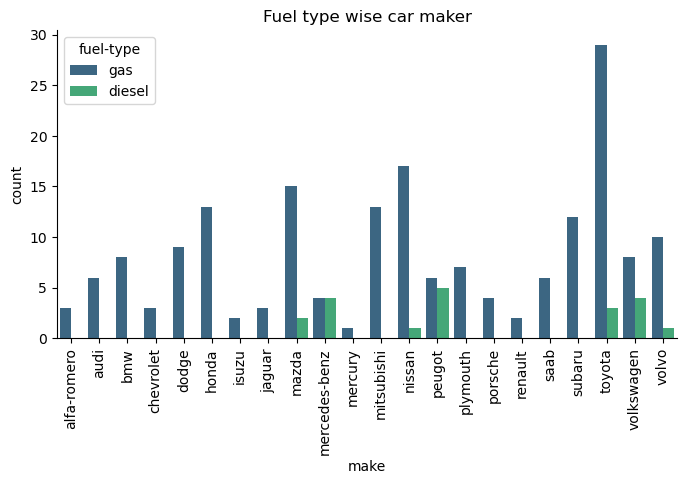

In [138]:
plt.figure(figsize=(8,4))

sns.countplot(data=dataset, x ='make' ,hue='fuel-type', palette='viridis')
sns.despine(right=True)

plt.xticks(rotation=90)
plt.title('Fuel type wise car maker')
plt.show()

In [140]:
dataset.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,hp_w_ratio
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495,0.043564
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500,0.043564


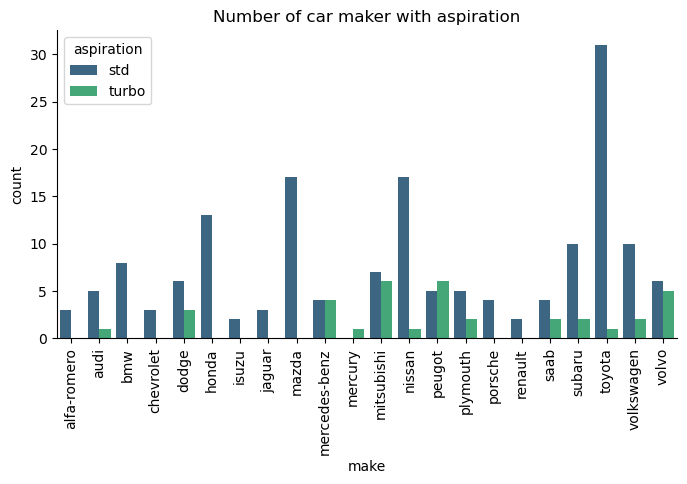

In [150]:
plt.figure(figsize=(8,4))
sns.countplot(data=dataset, x ='make' ,hue='aspiration', palette='viridis')
sns.despine(right=True)

plt.xticks(rotation=90)
plt.title('Number of car maker with aspiration')
plt.show()

In [154]:
dataset['engine-location'].value_counts()

engine-location
front    198
rear       3
Name: count, dtype: int64

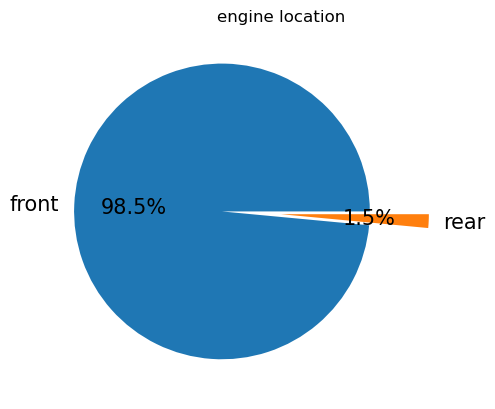

In [236]:
eng_location = dataset.groupby('engine-location')['engine-location'].count()
plt.pie(eng_location,labels= eng_location.index, explode=[0.4,0], autopct = '%1.1f%%', textprops={'color':'black', 'size':15}) 
plt.title('engine location')
plt.show()

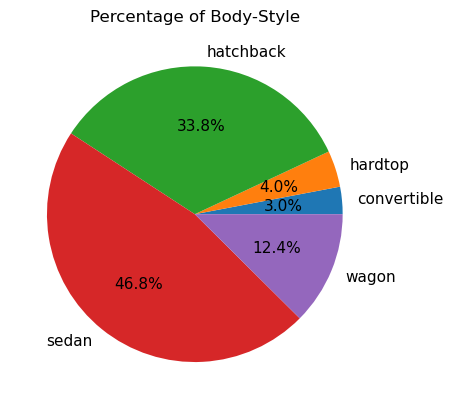

In [248]:
car_body = dataset.groupby('body-style')['body-style'].count()
plt.pie(car_body, labels=car_body.index, autopct='%1.1f%%',textprops={'color':'black','size': 11})
plt.title('Percentage of Body-Style')
#plt.legend()
plt.show()

In [156]:
dataset['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

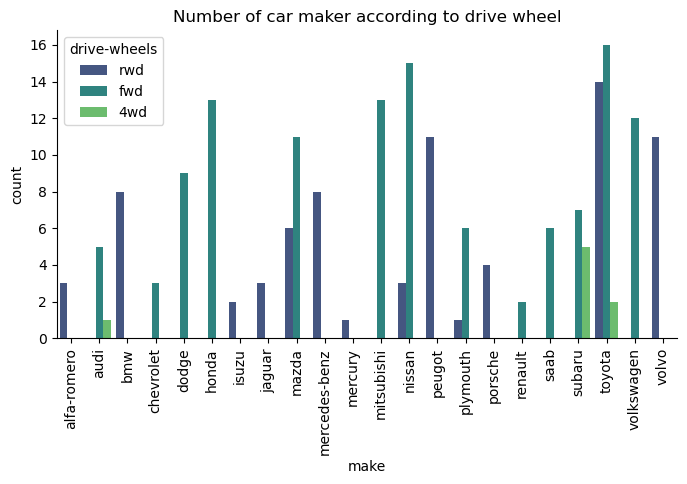

In [172]:
plt.figure(figsize=(8,4))
sns.countplot(data=dataset, x ='make' ,hue='drive-wheels', palette='viridis')
sns.despine(right=True)

plt.xticks(rotation=90)
plt.title('Number of car maker according to drive wheel')
plt.show()

In [174]:
dataset['engine-type'].value_counts()

engine-type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: count, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_10876\1385184113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_engine.index, y = car_engine, palette ='viridis')


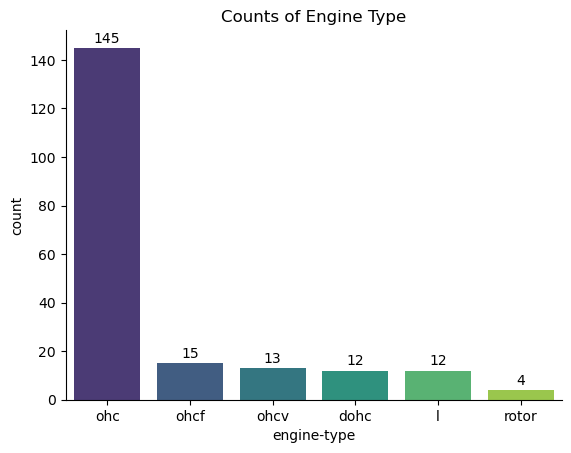

In [202]:
car_engine = dataset['engine-type'].value_counts()
sns.barplot(x=car_engine.index, y = car_engine, palette ='viridis')
sns.despine(right=True)
for i,v in enumerate(car_engine):
    plt.text(i, v+1, str(v),ha='center', va='bottom')

#plt.xticks('engine type')
plt.title('Counts of Engine Type')
plt.show()

# Predicting car price

In [37]:
x = dataset.drop(['price','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','bore','stroke','peak-rpm'],axis=1)

In [38]:
x.shape

(201, 13)

In [39]:
y = dataset['price']

In [40]:
y.shape

(201,)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size= 0.7,random_state=30)

In [43]:
xtrain.shape

(140, 13)

In [44]:
ytrain.shape

(140,)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg = LinearRegression()

In [47]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [48]:
y_pred = reg.predict(xtest)
print(y_pred)

[ 9623.10990626 17687.66751526  8127.92651263  7593.28086922
 23900.75883623  5478.09613957 14235.52582309  8405.91211484
 13848.55452378 11160.81112732 21336.32572804 10927.27580952
  4795.72746154 25257.96877795 15867.62103837  8973.19714479
 18859.08321192 13383.22520507  6548.13291453 16599.57528278
  6409.78139945  6575.57030372 17158.74823366  5921.65602534
 22779.63580043 18107.90856926 16307.45329162 23708.94463128
 21740.61455634 23825.90136704  9376.96617787 12167.45296302
  9452.30245567 20134.81090039  7686.52050503  5478.09613957
 10644.20048058  7194.67829991 19001.80374602 17407.73921415
 24104.97814818 11893.37770147  5574.60879958  6389.56616114
 10185.23102965 -1156.34109009 10644.20048058 11578.68939739
 10196.79916842 17729.47694946  6759.2651074  12118.19943902
  5971.00052955 22654.9555354  12167.45296302  6257.24286925
 18237.39098041 14473.92428892  4120.02870338 15536.03989407
 14261.18265969]


In [49]:
reg.score(xtrain,ytrain)

0.8676069958489845

In [50]:
reg.score(xtest,ytest)

0.635930221018441

# With polynomial features

In [52]:
from sklearn.preprocessing import PolynomialFeatures 

In [53]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [54]:
x_poly.shape

(201, 105)

In [55]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x_poly,y, test_size=0.3,random_state=30)

In [56]:
reg2 = LinearRegression()
reg2.fit(xtrain1,ytrain1)

LinearRegression()

In [57]:
reg2.predict(xtest1)

array([ 12680.77749634,  15824.44165039,   3312.33383179,  10645.3616333 ,
        32001.05352783,   6076.23651123,  14297.50018311,   5558.72006226,
        10084.74356079,  14443.55389404,   7312.08468628,  12333.57342529,
         7995.19396973,  18018.18081665,   2956.45111084,   1976.53881836,
        22361.37689209,  -2882.54742432,   7224.07794189,  17951.30499268,
         4492.68426514,  12673.3114624 ,  27454.26266479,   8580.38116455,
        20011.77813721,  22802.05209351,  15399.5914917 ,   9763.34228516,
        19058.76358032, -11425.34182739,  11942.94802856,  12260.34664917,
        11447.9375    ,   5361.65750122,  12327.0234375 ,   6076.23651123,
       -22780.62896729,  16987.90118408,  23169.08856201,  14991.70565796,
        32093.16870117,  16261.64163208,   2133.40756226,  12891.20510864,
         3196.08679199,  -6735.96200562, -22780.62896729,  13066.90759277,
        22124.3682251 ,  15775.83383179,  14780.43615723,   4246.14163208,
         8943.27316284,  

In [58]:
reg2.score(xtrain1,ytrain1)

0.8812845408205005

In [59]:
reg2.score(xtest1,ytest1)   #not satisfied with testing score now it is a overfit model

-1.4314985288497408

# KNN Algorithm

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knn = KNeighborsRegressor()

In [63]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [64]:
knn_pred_y = knn.predict(xtest)
knn_pred_y

array([10219.8, 15849.6,  7913.8,  8204.2, 19657.8,  6813.6,  9857.6,
        9355. , 13872.6, 10006.8, 15849.6,  9445.8,  5990.4, 36769.6,
       17443. ,  8754.2, 29156.6, 12426.2,  6980.2, 19691. ,  6061.2,
        7538.4, 15780.6,  7040.2, 24724. , 19648. , 16865.8, 19653.6,
       19021.8, 17204.6,  8372.6,  9621.4,  8772.6, 17066.8, 10261.4,
        6813.6,  9857.6,  8204.2, 21097. , 15780.6, 19657.8,  9237.4,
        6839. ,  7093. , 10222.6,  6044.6,  9857.6, 10006.8,  8548.2,
       16990.2,  7380.8,  8354. ,  6839. , 18079.4,  9621.4,  7380.8,
       15780.6, 13872.6,  5990.4, 15703.8,  9651.4])

In [65]:
knn.score(xtrain,ytrain)

0.8607959900482196

In [66]:
knn.score(xtest,ytest)

0.5480160421715778